<a href="https://colab.research.google.com/github/SSAFY11-Data-ML-Study/2024_0403_Salary_Data2/blob/main/20240403_%EC%9D%B4%EC%8A%B9%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Load

In [ ]:
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')

In [ ]:
train

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,TRAIN_19995,33,M,High graduate,Children or Armed Forces,52,Manufacturing (Durable),Handlers/Cleaners,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,1300
19996,TRAIN_19996,20,F,College,Full-Time,12,Education,Admin Support (include Clerical),White,Mexican-American,...,Native,US,Mexico,Mexico,Nonfiler,0,0,0,Under Median,850
19997,TRAIN_19997,22,M,College,Children or Armed Forces,52,Transportation,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Unknown,999
19998,TRAIN_19998,76,F,High graduate,Not Working,0,Not in universe or children,Unknown,White,All other,...,Native,US,Scotland,England,Single,0,0,0,Under Median,0


In [ ]:
test

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,TEST_0000,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Householder,Native,US,Unknown,Unknown,Single,0,0,0,Under Median
1,TEST_0001,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
2,TEST_0002,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,...,Child 18 or older,Native,US,US,US,Single,0,0,0,Under Median
3,TEST_0003,39,F,Associates degree (Vocational),Full-Time,30,Medical (except Hospitals),Services,White,All other,...,Spouse of householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown
4,TEST_0004,6,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,Mexican-American,...,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TEST_9995,31,M,Bachelors degree,Children or Armed Forces,52,Other professional services,Technicians & Support,White,All other,...,Householder,Native,US,US,US,Single,0,0,0,Under Median
9996,TEST_9996,27,M,College,Children or Armed Forces,52,Retail,Handlers/Cleaners,White,All other,...,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median
9997,TEST_9997,18,M,High graduate,Children or Armed Forces,7,Retail,Services,Black,All other,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
9998,TEST_9998,9,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Under Median


# Data Preprocessing

### Missing Value

In [ ]:
train.isnull().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          0
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
Income                    0
dtype: int64

In [ ]:
test.isnull().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          1
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
dtype: int64

In [ ]:
test['Household_Status'].fillna('Other Rel 18+ never marr not in subfamily', inplace=True)

In [ ]:
test.isnull().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          0
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
dtype: int64

# Data Split

In [ ]:
correction = 100

In [ ]:
train = train[train['Income'] < 3000]

In [ ]:
target = train['Income']
train = train.drop(columns=['ID', 'Income'])

test = test.drop(columns=['ID'])

In [ ]:
target = np.log(target+correction)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train, target, test_size=0.1, random_state=42)
# x_train, x_valid, y_train, y_valid = train_test_split(train, target, test_size=0.1, random_state=42, stratify=target)

# Modeling

In [ ]:
x_train.dtypes

Age                        int64
Gender                    object
Education_Status          object
Employment_Status         object
Working_Week (Yearly)      int64
Industry_Status           object
Occupation_Status         object
Race                      object
Hispanic_Origin           object
Martial_Status            object
Household_Status          object
Household_Summary         object
Citizenship               object
Birth_Country             object
Birth_Country (Father)    object
Birth_Country (Mother)    object
Tax_Status                object
Gains                      int64
Losses                     int64
Dividends                  int64
Income_Status             object
dtype: object

In [ ]:
categorical_features = list(x_train.dtypes[x_train.dtypes == "object"].index)

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 4.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor, Pool

train_pool = Pool(data=x_train, label=y_train, cat_features=categorical_features)
valid_pool = Pool(data=x_valid, label=y_valid, cat_features=categorical_features)

cat = CatBoostRegressor(iterations=2000, learning_rate=0.1, random_strength=0.5, depth=7, random_state=42, verbose=100)
cat.fit(train_pool, eval_set=(valid_pool), verbose=2)

0:	learn: 1.1139355	test: 1.1163714	best: 1.1163714 (0)	total: 71.3ms	remaining: 2m 22s
2:	learn: 1.0414191	test: 1.0462904	best: 1.0462904 (2)	total: 193ms	remaining: 2m 8s
4:	learn: 0.9921388	test: 0.9985485	best: 0.9985485 (4)	total: 275ms	remaining: 1m 49s
6:	learn: 0.9572767	test: 0.9655103	best: 0.9655103 (6)	total: 339ms	remaining: 1m 36s
8:	learn: 0.9308766	test: 0.9399823	best: 0.9399823 (8)	total: 448ms	remaining: 1m 39s
10:	learn: 0.9118246	test: 0.9220782	best: 0.9220782 (10)	total: 570ms	remaining: 1m 43s
12:	learn: 0.8979475	test: 0.9092170	best: 0.9092170 (12)	total: 691ms	remaining: 1m 45s
14:	learn: 0.8881294	test: 0.9001189	best: 0.9001189 (14)	total: 819ms	remaining: 1m 48s
16:	learn: 0.8809395	test: 0.8932556	best: 0.8932556 (16)	total: 935ms	remaining: 1m 49s
18:	learn: 0.8753311	test: 0.8884773	best: 0.8884773 (18)	total: 1.07s	remaining: 1m 51s
20:	learn: 0.8716289	test: 0.8850038	best: 0.8850038 (20)	total: 1.19s	remaining: 1m 52s
22:	learn: 0.8676869	test: 0.88

In [ ]:
y_train_pred = cat.predict(train_pool)
y_train_pred = np.exp(y_train_pred)-correction
y_valid_pred = cat.predict(valid_pool)
y_valid_pred = np.exp(y_valid_pred)-correction

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, y_train_pred) ** 0.5)
print(mean_squared_error(y_valid, y_valid_pred) ** 0.5)

445.02949920365546
440.9480251539754


- 321.21196372808515
- 315.64526606479257

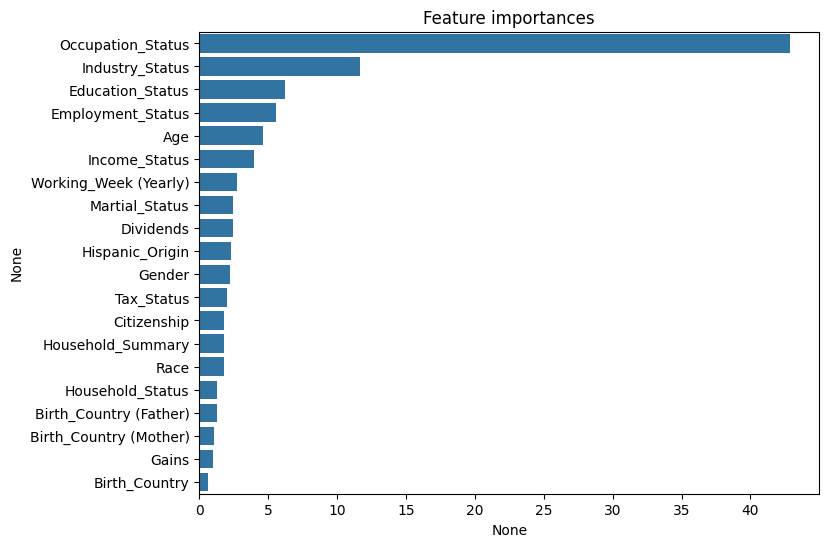

In [ ]:
%matplotlib inline

cat_importances_values = cat.feature_importances_
cat_importances = pd.Series(cat_importances_values, index=x_train.columns)
cat_top20 = cat_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances')
sns.barplot(x=cat_top20, y=cat_top20.index)
plt.show()

In [ ]:
test_pool = Pool(data=test, cat_features=categorical_features)
test_pred = cat.predict(test_pool)

test_pred = np.exp(test_pred)-correction
test_pred = [0 if i < 0 else i for i in test_pred]

# 쓸데없는 하이퍼파라미터 튜닝이라는 것..을 해 보았다

In [ ]:
import catboost
model = catboost.CatBoostRegressor(eval_metric='RMSE', iterations=10000, random_strength=0.5, random_state=42, verbose=100)

In [ ]:
param_grid = {
    'n_estimators': list(range(100, 500)),
    'depth': list(range(3, 10)),
    'learning_rate': [0.001, 0.01, 0.1],
    'min_child_samples': list(range(10, 40)),
    'grow_policy': ['SymmetricTree', 'Lossguide', 'Depthwise']
}

In [ ]:
model.randomized_search(param_grid, train_pool, cv=3, n_iter=10)

0:	learn: 891.8231241	test: 866.9868382	best: 866.9868382 (0)	total: 82.2ms	remaining: 37.3s
100:	learn: 664.5561012	test: 628.8704537	best: 628.8704537 (100)	total: 4.8s	remaining: 16.8s
200:	learn: 619.7981305	test: 580.4295072	best: 580.4295072 (200)	total: 5.95s	remaining: 7.51s
300:	learn: 609.7490025	test: 569.5977206	best: 569.5977206 (300)	total: 7.36s	remaining: 3.76s
400:	learn: 606.7710082	test: 566.5492329	best: 566.5492329 (400)	total: 8.82s	remaining: 1.19s
454:	learn: 605.8115120	test: 565.7531426	best: 565.7531426 (454)	total: 9.69s	remaining: 0us

bestTest = 565.7531426
bestIteration = 454

0:	loss: 565.7531426	best: 565.7531426 (0)	total: 9.78s	remaining: 1m 28s
0:	learn: 891.5782260	test: 866.7168210	best: 866.7168210 (0)	total: 78.8ms	remaining: 37.1s
100:	learn: 653.7042528	test: 617.9060036	best: 617.9060036 (100)	total: 10.5s	remaining: 38.7s
200:	learn: 603.2988008	test: 569.9689058	best: 569.9689058 (200)	total: 22.7s	remaining: 30.6s
300:	learn: 589.0124914	te

{'params': {'grow_policy': 'Depthwise',
  'min_data_in_leaf': 10,
  'depth': 7,
  'learning_rate': 0.1,
  'iterations': 397},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
 

In [ ]:
model.fit(train_pool, eval_set=(valid_pool), verbose=2)

0:	learn: 680.9122124	test: 712.3101126	best: 712.3101126 (0)	total: 41.6ms	remaining: 16.5s
2:	learn: 654.3297528	test: 684.9371255	best: 684.9371255 (2)	total: 110ms	remaining: 14.5s
4:	learn: 635.9282519	test: 665.9210737	best: 665.9210737 (4)	total: 170ms	remaining: 13.3s
6:	learn: 622.6413672	test: 652.1179377	best: 652.1179377 (6)	total: 232ms	remaining: 12.9s
8:	learn: 612.3973883	test: 641.7644950	best: 641.7644950 (8)	total: 299ms	remaining: 12.9s
10:	learn: 605.3683783	test: 635.1565091	best: 635.1565091 (10)	total: 356ms	remaining: 12.5s
12:	learn: 599.9553636	test: 629.9819139	best: 629.9819139 (12)	total: 414ms	remaining: 12.2s
14:	learn: 595.0942465	test: 626.5965999	best: 626.5965999 (14)	total: 480ms	remaining: 12.2s
16:	learn: 592.1674557	test: 624.1016206	best: 624.1016206 (16)	total: 541ms	remaining: 12.1s
18:	learn: 589.3181241	test: 622.0841689	best: 622.0841689 (18)	total: 604ms	remaining: 12s
20:	learn: 587.2643941	test: 620.9333328	best: 620.9333328 (20)	total: 

In [ ]:
y_train_pred = model.predict(train_pool)
y_valid_pred = model.predict(valid_pool)

test_pool = Pool(data=test, cat_features=categorical_features)
test_pred = model.predict(test_pool)
test_pred = [0 if i < 0 else i for i in test_pred]

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, y_train_pred) ** 0.5)
print(mean_squared_error(y_valid, y_valid_pred) ** 0.5)

545.555825994817
611.0471541892332


그냥 뭐 슥 봐도 망한 거 같죠?

In [ ]:
submission = pd.read_csv('/content/sample_data/sample_submission.csv')
submission['Income'] = test_pred
submission

,ID,Income
0,TEST_0000,5.179422
1,TEST_0001,0.000000
2,TEST_0002,450.504668
3,TEST_0003,664.864070
4,TEST_0004,0.000000
...,...,...
9995,TEST_9995,869.079773
9996,TEST_9996,754.858477
9997,TEST_9997,405.285439
9998,TEST_9998,2.038133


In [ ]:
submission.to_csv("first_final.csv", index=False)

# Submission

In [ ]:
submit = pd.read_csv('/content/sample_data/sample_submission.csv')
submit['Income'] = test_pred

submit.loc[test['Employment_Status'] == 'Not working', 'Income'] = 0
submit.loc[test['Industry_Status'] == 'Not in universe or children', 'Income'] = 0
submit.loc[test['Industry_Status'] == 'Armed Forces', 'Income'] = 0
submit.loc[test['Occupation_Status'] == 'Unknown', 'Income'] = 0
submit.loc[test['Occupation_Status'] == 'Armed Forces', 'Income'] = 0
submit.loc[test['Birth_Country'] == 'Panama', 'Income'] = 0

submit

,ID,Income
0,TEST_0000,0.000000
1,TEST_0001,0.000000
2,TEST_0002,361.530223
3,TEST_0003,377.929604
4,TEST_0004,0.000000
...,...,...
9995,TEST_9995,442.126338
9996,TEST_9996,573.892094
9997,TEST_9997,309.426479
9998,TEST_9998,0.000000


In [ ]:
submit.to_csv("catboost_3000cut_log100.csv", index=False)